<a href="https://colab.research.google.com/github/vineela9804/Final-project/blob/main/importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print("Historical data shape:", x_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Historical data shape: (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.8486 - loss: 0.5186 - val_accuracy: 0.9802 - val_loss: 0.0669
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9790 - loss: 0.0665 - val_accuracy: 0.9860 - val_loss: 0.0481
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9908 - loss: 0.0308 - val_accuracy: 0.9845 - val_loss: 0.0488
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9892 - val_loss: 0.0365


In [1]:
#training the model

In [4]:
train_outputs = cnn.predict(x_train)
print("Model output shape:", train_outputs.shape)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
Model output shape: (60000, 10)


In [5]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_dim = train_outputs.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='softmax')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346 (1.35 KB)

 Trainable params: 346 (1.35 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.fit(
    train_outputs,
    train_outputs,
    epochs=20,
    batch_size=256,
    validation_split=0.1
)


Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0762e-04 - val_loss: 3.0456e-05
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0619e-05 - val_loss: 2.9731e-05
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9987e-05 - val_loss: 2.9014e-05
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9272e-05 - val_loss: 2.8170e-05
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8069e-05 - val_loss: 2.6934e-05
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6861e-05 - val_loss: 2.5186e-05
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4919e-05 - val_loss: 2.2648e-05
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2268e-05 - val_loss: 1.9864e-05
Epoch 9/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9329e-05 - val_loss: 1.7006e-05
Epoch 10/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6678e-05 - val_loss: 1.4974e-05
Epoch 11/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [7]:
# Add noise to simulate data drift
noise = np.random.normal(0, 0.3, x_test.shape)
x_test_drift = np.clip(x_test + noise, 0, 1)

print("New (drifted) data created")


New (drifted) data created


In [8]:
# CNN outputs on new data
test_outputs = cnn.predict(x_test_drift)

# Autoencoder reconstruction
reconstructed = autoencoder.predict(test_outputs)

# Reconstruction error
reconstruction_error = np.mean(
    np.square(test_outputs - reconstructed), axis=1
)

# Threshold
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

drift_flags = reconstruction_error > threshold

print("Drift detected samples:", np.sum(drift_flags))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Drift detected samples: 432


In [10]:
import matplotlib.pyplot as plt


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


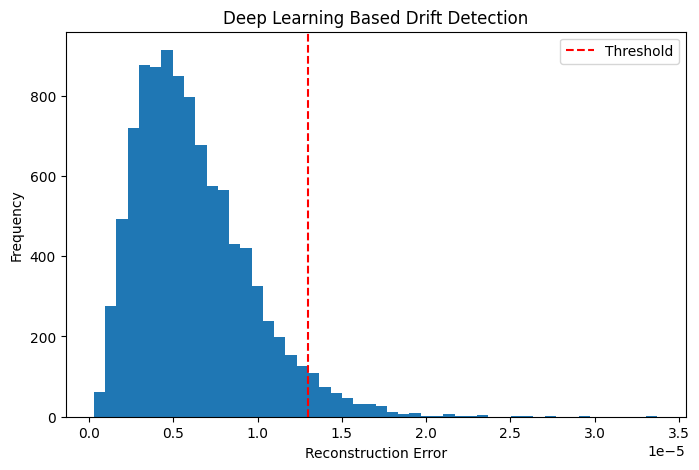

In [13]:
plt.figure(figsize=(8,5))
plt.hist(reconstruction_error, bins=50)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Deep Learning Based Drift Detection")
plt.legend()
plt.show()
